# 行うこと

# ライブラリーの読み込みとバージョンの確認

In [1]:
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, PandasTools
print(rdBase.rdkitVersion)

2021.03.3


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [3]:
df = PandasTools.LoadSDF('data/data_set.sdf')

RDKit ERROR: [16:36:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 428 in file /private/var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/pip-req-build-9ddd7xc7/build/temp.macosx-10.9-x86_64-3.8/rdkit/rdkit/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(bond_pin->getBeginAtomIdx(), bond_pin->getEndAtomIdx(), d_graph) .second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [16:36:46] Unexpected error hit on line 8255


In [4]:
df.dtypes

CAS_Number    object
logS          object
ID            object
ROMol         object
CA_Number     object
dtype: object

# データの読み込みと加工 (finger printの作成)

In [5]:
import numpy as np

fingerprints = []
safe = []
for mol_idx, mol in enumerate(df["ROMol"]):
    try:
        fingerprint = [x for x in AllChem.GetMorganFingerprintAsBitVect(mol, 2, 2048)]
        fingerprints.append(fingerprint)
        safe.append(mol_idx)
        
    except:
        print("Error", mol_idx)
        continue
fingerprints = np.array(fingerprints)
print(fingerprints.shape)
df_fp = pd.DataFrame(fingerprints)

(1289, 2048)


In [6]:
df_fp

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# トレーニングデータとテストデータの分割

In [7]:
X = df_fp

In [8]:
y = df['logS']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 10)
X_train = X_train.sort_index()
X_train

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_test = X_test.sort_index()
X_test

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1256,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y_train = y_train.sort_index()
y_train

0         1.58
1         1.34
2         1.22
3         1.15
4         1.12
         ...  
1284      -8.6
1285     -8.65
1286     -8.66
1287     -9.03
1288    -10.26
Name: logS, Length: 1160, dtype: object

In [24]:
y_test = y_test.sort_index()
y_test

0         1.1
1        1.07
2        0.57
3        0.48
4        0.32
        ...  
124     -5.46
125      -5.8
126     -5.89
127     -6.02
128    -10.41
Name: logS, Length: 129, dtype: object

# 学習

In [25]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth = 7, n_estimators = 500, n_jobs = -1, random_state = 100)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=500, n_jobs=-1,
                      random_state=100)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
score = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(score)
print(f'rmse: {rmse:.4f}')
score2 = r2_score(y_test, y_pred)
print("R2", score2)
y_predtrain = model.predict(X_train)

rmse: 1.1371
R2 0.711098873384673


In [27]:
y_predtrain = y_predtrain.reshape(-1, 1)
y_predtrain = pd.DataFrame(y_predtrain)
y_predtrain

,0
0,-0.735851
1,-1.354848
2,-0.794389
3,-1.144575
4,-0.707618
...,...
1155,-6.379292
1156,-6.903315
1157,-6.658560
1158,-8.290609


# 結果の確認

In [28]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(model, X_train, y_train, scoring ='neg_mean_squared_error', cv = 10)

In [29]:
cross_validation = cross_validation * -1
cross_validation

array([4.66565717, 1.53081505, 0.69472775, 0.87012806, 1.26086043,
       2.49246555, 5.90063783, 1.39132141, 0.61638842, 3.43598586])

In [30]:
rmse = np.mean(np.sqrt(cross_validation))
print('RMSE_CV')
print(rmse)

RMSE_CV
1.4112630102690162


In [31]:
"""from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [100, 200, 500, 1000]}]
grid_search = GridSearchCV(estimator = random_forest, 
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = len(y_train), 
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_score = np.sqrt(-1 * grid_search.best_score_)
best_parameters = grid_search.best_params_
print("Best Score: {:.2f}".format(best_score.mean()))
print("Best Parameters:", best_parameters)
best_rf = grid_search.best_estimator_"""

'from sklearn.model_selection import GridSearchCV\nparameters = [{\'n_estimators\': [100, 200, 500, 1000]}]\ngrid_search = GridSearchCV(estimator = random_forest, \n                           param_grid = parameters,\n                           scoring = \'neg_mean_squared_error\',\n                           cv = len(y_train), \n                           n_jobs = -1)\ngrid_search.fit(X_train, y_train)\nbest_score = np.sqrt(-1 * grid_search.best_score_)\nbest_parameters = grid_search.best_params_\nprint("Best Score: {:.2f}".format(best_score.mean()))\nprint("Best Parameters:", best_parameters)\nbest_rf = grid_search.best_estimator_'

In [32]:
y_test.reset_index(inplace=True, drop=True)
rf_plot = pd.concat([y_test, y_pred], axis = 1)
rf_plot.columns = ['y_test', 'y_pred']
rf_plot

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [ ]:
y_train.reset_index(inplace=True, drop=True)
rf_plot2 = pd.concat([y_train, y_predtrain], axis = 1)
rf_plot2.columns = ['y_train', 'pred']
rf_plot2

NameError: name 'rf_plot' is not defined

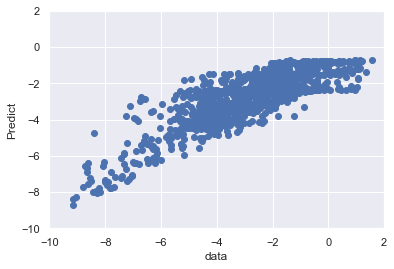

In [23]:
plt.figure()

x1 = rf_plot2.y_train.astype(float)
y1 = rf_plot2.pred.astype(float)

plt.scatter(x1, y1)

plt.xlim(-10, 2)
plt.ylim(-10, 2)

plt.xlabel('data')
plt.ylabel('Predict')

x2 = rf_plot.y_test.astype(float)
y2 = rf_plot.y_pred.astype(float)

plt.scatter(x2, y2)

plt.show()

# 重要度解析

In [ ]:
plt.rcParams["figure.figsize"] = [13,4]
fi_rf = model.feature_importances_  
features_rf = pd.DataFrame({'feature': list(X_train.columns),
                            'feature_importance': fi_rf[:]}).sort_values('feature_importance', ascending = False)
features_rf = features_rf[features_rf['feature_importance'] != 0]
plt.scatter(features_rf.iloc[:10, :].feature, features_rf.iloc[:10, :].feature_importance);
features_rf

# 重要だったfingerprintの確認をしみてる。

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import DrawMorganBits, IPythonConsole
help(Draw.DrawMorganBits)          
                   

# 予想が外れた化合物の確認をしてみる。

# 学習結果から考えることや検討項目など

1. 化合物の表現方法として、フィンガープリント以外にもさまざまな「化学構造記述子」がある。

2. 機械学習手法として、ランダムフォレスト以外にも色々な手法がある。

3. パラメータ調節方法として、グリッドサーチやベイズ最適化などの方法がある。

4. 機械学習で注意すべき点として「過学習」という現象があり、それを防ぐための方法論として「交差検定」などがある。
